In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import *

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
backup_df = df

In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype("float")

In [7]:
one_hot = pd.get_dummies(df['gender'])
df = df.drop('gender',axis = 1)
df = df.join(one_hot)
df = df.drop('Female', axis = 1)
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [8]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].map({'Yes' : 1, 'No' : 0, 'No phone service' : 0})


df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})
df['TechSupport'] = df['TechSupport'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes' : 1, 'No' : 0, 'No internet service' : 0})



df.head(10)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0
5,9305-CDSKC,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,0
6,1452-KIOVK,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,1
7,6713-OKOMC,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,0
8,7892-POOKP,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,0
9,6388-TABGU,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,1


In [9]:

one_hot = pd.get_dummies(df['InternetService'])
#one_hot = one_hot.drop('No',axis = 1)
one_hot.rename(columns={'No': 'InternetService'}, inplace=True)
df = df.drop('InternetService',axis = 1)
df = df.join(one_hot)
df.head(10)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,DSL,Fiber optic,InternetService
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1,0,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,1,0
5,9305-CDSKC,0,0,0,8,1,1,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,0,0,1,0
6,1452-KIOVK,0,0,1,22,1,1,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,1,0,1,0
7,6713-OKOMC,0,0,0,10,0,0,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,0,1,0,0
8,7892-POOKP,0,1,0,28,1,1,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,0,0,1,0
9,6388-TABGU,0,0,1,62,1,0,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,1,1,0,0


In [10]:
one_hot = pd.get_dummies(df['Contract'])
df = df.drop('Contract',axis = 1)
df = df.join(one_hot)
df.head(10)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,DSL,Fiber optic,InternetService,Month-to-month,One year,Two year
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,Electronic check,29.85,29.85,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,Mailed check,56.95,1889.50,0,1,1,0,0,0,1,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,Mailed check,53.85,108.15,1,1,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1,0,0,1,0,1,0,0
5,9305-CDSKC,0,0,0,8,1,1,0,0,1,0,1,1,1,Electronic check,99.65,820.50,1,0,0,1,0,1,0,0
6,1452-KIOVK,0,0,1,22,1,1,0,1,0,0,1,0,1,Credit card (automatic),89.10,1949.40,0,1,0,1,0,1,0,0
7,6713-OKOMC,0,0,0,10,0,0,1,0,0,0,0,0,0,Mailed check,29.75,301.90,0,0,1,0,0,1,0,0
8,7892-POOKP,0,1,0,28,1,1,0,0,1,1,1,1,1,Electronic check,104.80,3046.05,1,0,0,1,0,1,0,0
9,6388-TABGU,0,0,1,62,1,0,1,1,0,0,0,0,0,Bank transfer (automatic),56.15,3487.95,0,1,1,0,0,0,1,0


In [11]:
one_hot = pd.get_dummies(df['PaymentMethod'])
df = df.drop('PaymentMethod',axis = 1)
df = df.join(one_hot)
df.head(10)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,DSL,Fiber optic,InternetService,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,1,0,0,0,0,1,0
5,9305-CDSKC,0,0,0,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,0,0,1,0,1,0,0,0,0,1,0
6,1452-KIOVK,0,0,1,22,1,1,0,1,0,0,1,0,1,89.10,1949.40,0,1,0,1,0,1,0,0,0,1,0,0
7,6713-OKOMC,0,0,0,10,0,0,1,0,0,0,0,0,0,29.75,301.90,0,0,1,0,0,1,0,0,0,0,0,1
8,7892-POOKP,0,1,0,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,0,0,1,0,1,0,0,0,0,1,0
9,6388-TABGU,0,0,1,62,1,0,1,1,0,0,0,0,0,56.15,3487.95,0,1,1,0,0,0,1,0,1,0,0,0


In [12]:
T = df['tenure']
E = df['Churn']

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')

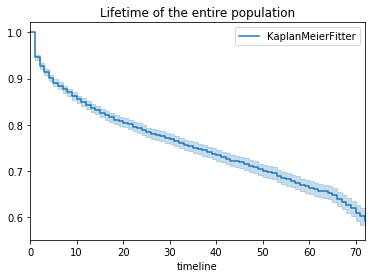

In [13]:
kmf.plot_survival_function() #ax=axes[1][0])
plt.title("Lifetime of the entire population");

In [14]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)

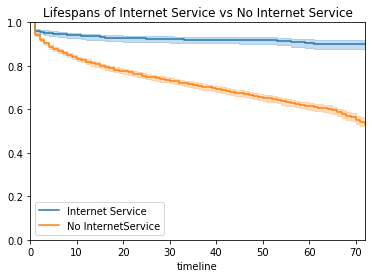

In [15]:
ax = plt.subplot(111)

dem = (df["InternetService"] == 1)

kmf.fit(T[dem], event_observed=E[dem], label="Internet Service")
kmf.plot(ax=ax)
kmf.fit(T[~dem], event_observed=E[~dem], label="No InternetService")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of Internet Service vs No Internet Service");

In [16]:
new_df = df.drop('customerID', axis = 1)
#new_df.drop('PhoneService', axis = 1, inplace=True)
#new_df.drop('InternetService', axis = 1, inplace=True)
new_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,DSL,Fiber optic,InternetService,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,1,0,0,0,0,1,0


In [17]:
new_df.drop('Month-to-month',axis = 1, inplace=True)
new_df.drop('Fiber optic',axis = 1, inplace=True)
new_df.drop('MonthlyCharges',axis = 1, inplace=True)

new_df.drop('OnlineSecurity',axis = 1, inplace=True)
new_df.drop('OnlineBackup',axis = 1, inplace=True)
new_df.drop('DeviceProtection',axis = 1, inplace=True)
new_df.drop('MultipleLines',axis = 1, inplace=True)
new_df.drop('TechSupport',axis = 1, inplace=True)
new_df.drop('StreamingMovies',axis = 1, inplace=True)

In [21]:
new_df.drop('DSL',axis = 1, inplace=True)
new_df.drop('One year',axis = 1, inplace=True)
new_df.drop('Two year',axis = 1, inplace=True)
new_df.drop('Bank transfer (automatic)',axis = 1, inplace=True)
new_df.drop('Credit card (automatic)',axis = 1, inplace=True)
new_df.drop('Electronic check',axis = 1, inplace=True)
new_df.drop('Mailed check',axis = 1, inplace=True)

In [22]:
new_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingTV,PaperlessBilling,TotalCharges,Churn,Male,InternetService
0,0,1,0,1,0,0,1,29.85,0,0,0
1,0,0,0,34,1,0,0,1889.50,0,1,0
2,0,0,0,2,1,0,1,108.15,1,1,0
3,0,0,0,45,0,0,0,1840.75,0,1,0
4,0,0,0,2,1,0,1,151.65,1,0,0


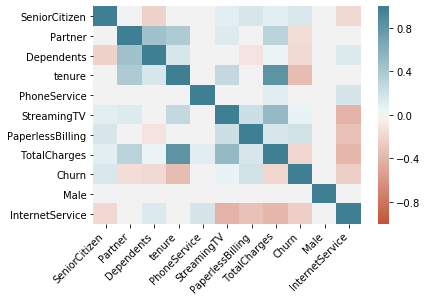

In [23]:
corr = new_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    #square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [57]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(new_df, 'tenure', event_col='Churn')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13368.01
         time fit was run = 2019-12-18 13:15:50 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
SeniorCitizen      0.43       1.54       0.06             0.32             0.54                 1.38                 1.72
Partner           -0.20       0.82       0.05            -0.31            -0.09                 0.74                 0.91
Dependents        -0.36       0.70       0.07            -0.49            -0.22                 0.61                 0.80
PhoneService       1.77       5.89       0.09             1.60             1.95                 4.94                 7.02
StreamingTV        0.67       1.95       0.05             0.5

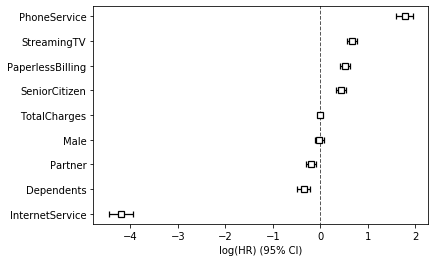

In [58]:
cph.plot()

In [59]:
new_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,StreamingTV,PaperlessBilling,TotalCharges,Churn,Male,InternetService
0,0,1,0,1,0,0,1,29.85,0,0,0
1,0,0,0,34,1,0,0,1889.50,0,1,0
2,0,0,0,2,1,0,1,108.15,1,1,0
3,0,0,0,45,0,0,0,1840.75,0,1,0
4,0,0,0,2,1,0,1,151.65,1,0,0


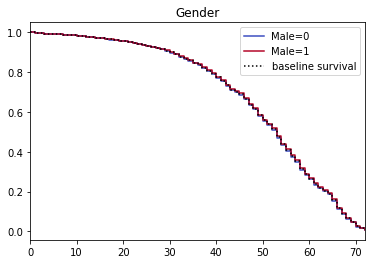

In [67]:
cph.plot_covariate_groups('Male', [0, 1], cmap='coolwarm')
plt.savefig('Media/Gender.png')
plt.title("Gender");

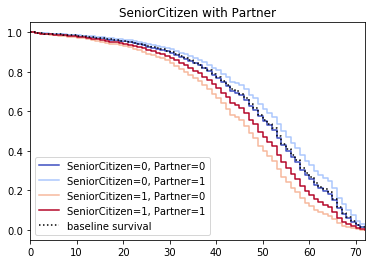

In [68]:
cph.plot_covariate_groups(['SeniorCitizen', 'Partner'], 
                            [
                                [0, 0],
                                [0, 1],
                                [1, 0],
                                [1, 1],
                            ],
                            cmap='coolwarm')
plt.savefig('Media/SeniorCitizen with Partner.png')
plt.title("SeniorCitizen with Partner");

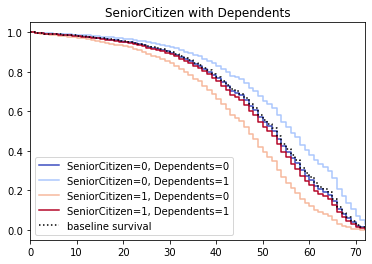

In [69]:
cph.plot_covariate_groups(['SeniorCitizen', 'Dependents'], 
                            [
                                [0, 0],
                                [0, 1],
                                [1, 0],
                                [1, 1],
                            ],
                            cmap='coolwarm')
plt.savefig('Media/SeniorCitizen with Dependents.png')
plt.title("SeniorCitizen with Dependents");

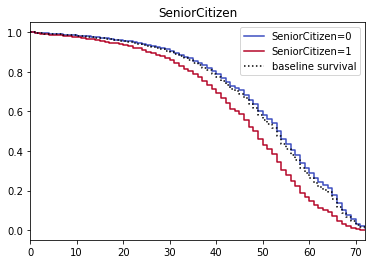

In [70]:
cph.plot_covariate_groups('SeniorCitizen', [0,1],cmap='coolwarm')
plt.savefig('Media/SeniorCitizen.png')
plt.title("SeniorCitizen");

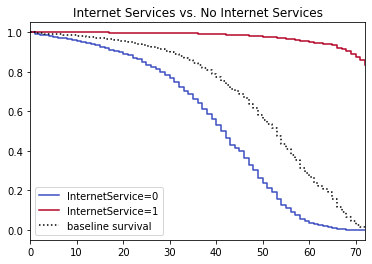

In [71]:
cph.plot_covariate_groups('InternetService', [0,1],cmap='coolwarm')
plt.savefig('Media/Internet Services vs No Internet Services.png')
plt.title("Internet Services vs. No Internet Services");

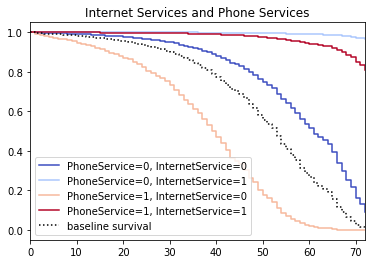

In [72]:
cph.plot_covariate_groups(
    ['PhoneService', 'InternetService'],
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1],
    ],
    cmap='coolwarm')
plt.savefig('Media/Internet Services and Phone Services.png')
plt.title("Internet Services and Phone Services");

## Dummy Example

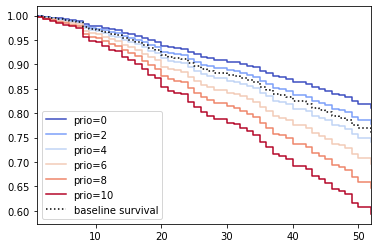

In [52]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi_dataset = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')

cph.plot_covariate_groups('prio', [0, 2, 4, 6, 8, 10], cmap='coolwarm')


In [53]:
rossi_dataset.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [54]:
X = rossi_dataset

cph.predict_partial_hazard(X)

,0
0,1.219126
1,3.230250
2,3.031058
3,0.487712
4,1.214025
5,1.238655
6,0.579853
7,1.110755
8,2.327246
9,1.297946


In [55]:
cph.predict_survival_function(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431
1.0,0.997616,0.993695,0.994083,0.999045,0.997626,0.997578,0.998865,0.997827,0.995453,0.997462,0.998272,0.999033,0.995627,0.998851,0.996438,0.998291,0.994085,0.996461,0.993918,0.998516,0.996714,0.999739,0.998857,0.999193,0.998359,0.997970,0.998788,0.996252,0.997417,0.998016,0.997947,0.997849,0.999509,0.998337,0.997346,0.998084,0.996717,0.997961,0.996920,0.998062,0.998784,0.997969,0.990824,0.997101,0.997643,0.997840,0.992921,0.997878,0.999088,0.998932,0.999307,0.998441,0.999122,0.995412,0.998953,0.998774,0.999214,0.997897,0.998404,0.998881,0.994601,0.997283,0.996187,0.996783,0.997435,0.998595,0.998082,0.998291,0.998703,0.996826,0.998108,0.996963,0.998642,0.997939,0.996749,0.999533,0.998165,0.999370,0.997558,0.995894,0.997465,0.998272,0.998218,0.994868,0.995105,0.998441,0.997326,0.996212,0.997949,0.998231,0.999268,0.997587,0.998084,0.998242,0.997899,0.997635,0.997969,0.997417,0.998074,0.998610,0.999294,0.998469,0.997189,0.997849,0.997033,0.998439,0.994601,0.998202,0.997033,0.997326,0.995315,0.998232,0.996461,0.998928,0.998865,0.997722,0.997561,0.996738,0.999445,0.997354,0.997299,0.997587,0.999278,0.994705,0.999004,0.998270,0.998864,0.994690,0.998827,0.997456,0.996400,0.997961,0.997504,0.996081,0.998231,0.997493,0.997328,0.998324,0.994936,0.999025,0.992224,0.993881,0.997921,0.997643,0.998610,0.998448,0.997938,0.997798,0.996636,0.998635,0.998651,0.999488,0.997292,0.997445,0.998717,0.998598,0.998189,0.999320,0.999578,0.997823,0.995809,0.997639,0.998462,0.999142,0.999140,0.998190,0.996159,0.998047,0.996907,0.999385,0.998580,0.995085,0.998504,0.994847,0.997914,0.992224,0.998082,0.997140,0.997643,0.995249,0.998732,0.996959,0.999546,0.997993,0.999043,0.998126,0.997952,0.999070,0.994740,0.999227,0.997415,0.998610,0.998686,0.997840,0.995724,0.998493,0.998477,0.998082,0.996857,0.997413,0.996639,0.997789,0.996738,0.998150,0.996920,0.997055,0.998765,0.998289,0.998181,0.997657,0.998251,0.998856,0.997994,0.998994,0.999189,0.997227,0.997960,0.997328,0.999012,0.998714,0.999468,0.998251,0.997417,0.998190,0.998082,0.998373,0.998218,0.998718,0.997263,0.998571,0.996508,0.997256,0.995916,0.997387,0.998139,0.997688,0.996658,0.997575,0.997969,0.998708,0.998382,0.991148,0.996857,0.997445,0.995724,0.998441,0.994377,0.997898,0.998348,0.996228,0.998189,0.998472,0.998501,0.997131,0.998989,0.998783,0.999097,0.998189,0.998932,0.998813,0.996639,0.997120,0.996966,0.994493,0

In [56]:
cph.predict_median(X)

,0.5
0,inf
1,44.0
2,46.0
3,inf
4,inf
5,inf
6,inf
7,inf
8,inf
9,inf
